### Importing libraries

In [1]:
import numpy as np
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt

Generating $A$ randomly using sklearn.datasets.make_spd_matrix,and generate $b$ and $c$ using np.random.rand function of numpy.

In [2]:
A = np.matrix(make_spd_matrix(10))
b = np.matrix(np.random.randn(10,1))
c = np.matrix(np.random.randn(1,1))

$f(x) = x^T A x - 2 b^T x + c$ \
$\Rightarrow \nabla f(x) = 2 A x - 2 b$ \
$\Rightarrow \nabla^2 f(x) = 2 A$ \
$ \nabla^2 f(x) > 0 \Rightarrow f$ is convex \
$ 2*A > 0 \Rightarrow A > 0 \Rightarrow A$ is positive definite $\Rightarrow f$ is convex \
So we need to check if $A$ is positive definite or not to know if $f$ is convex or not.

In [3]:
def f(x):
    return x.T @ A @ x -2 * b.T @ x + c

def gradient_f(x):
    return 2 * A @ x - 2 * b

def grad_grad_f(x):
    return 2 * A

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

### Problem 2 (a)
#### Analytical solution

In [4]:
if is_pos_def(A):
    print("A is positive definite, hence f is convex")

A is positive definite, hence f is convex


By setting the gradient of $f$ to zero, we can find the analytical solution
$\Rightarrow \nabla f(x) = 0$ \
$\Rightarrow 2 A x - 2 b = 0$ \
$\Rightarrow x = A^{-1} b$

In [5]:
result_gradient_zero = np.matrix(A.I @ b)

In [6]:
analytical_solution = f(result_gradient_zero)[0,0]

In [7]:
print("Minimizer using gradient zero:", result_gradient_zero)
print("Analytical solution by setting gradient to zero:", analytical_solution)

Minimizer using gradient zero: [[-1.47773205]
 [ 0.62229752]
 [ 4.27234816]
 [ 2.28670366]
 [ 8.4446222 ]
 [ 1.05823733]
 [-5.28442647]
 [ 6.65035515]
 [-7.22577486]
 [-9.69219262]]
Analytical solution by setting gradient to zero: -42.65716526724658


### Problem 2 (b)
#### Gradient descent

Initial point $x_0 = [1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10]^T$ where $x_0 \in \mathbb{R}^{10}$

In [8]:
x0 = np.matrix([[1/10],[1/10],[1/10],[1/10],[1/10],[1/10],[1/10],[1/10],[1/10],[1/10]])

Step size $\ l_{GD}= \frac{1}{2||A|| + ||b||_2}$ where $||A||$ is the spectral norm of $A$ and $||b||_2$ is the 2-norm of $b$

In [9]:
a_norm = np.linalg.norm(A, ord=2)
b_norm = np.linalg.norm(b)
step_size = 1 / ((2*a_norm) + b_norm)

In [10]:
def gradient_descent(x0, step_size, num_iterations):
    """
    Gradient descent algorithm
    :param x0: np.matrix - Initial point
    :param step_size: float - step size
    :param num_iterations: int - number of iterations
    :return: value of x after num_iterations, list of objective values
    """
    x = x0
    f_list = []
    for i in range(num_iterations):
        x = x - step_size * gradient_f(x)
        f_list.append(f(x).tolist()[0][0])
    return x, f_list

In [11]:
result_gradient_descent, f_list = gradient_descent(x0, step_size, 1000)

In [12]:
optimal_solution = f(result_gradient_descent)[0,0]

In [13]:
print("Minimizer using gradient descent:", result_gradient_descent)
print("Optimal Solution by using gradient descent:", optimal_solution)

Minimizer using gradient descent: [[-1.47790535]
 [ 0.62156988]
 [ 4.27138982]
 [ 2.28593234]
 [ 8.44167565]
 [ 1.05848769]
 [-5.28260315]
 [ 6.64963057]
 [-7.22392569]
 [-9.69060684]]
Optimal Solution by using gradient descent: -42.657163232877686


In the following plot, the blue line shows the objective value after each iteration and the red dashed line shows the analytical solution.

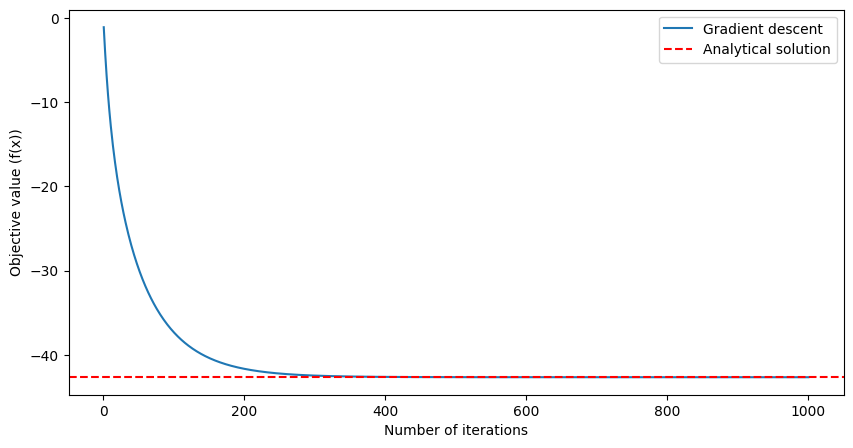

In [14]:
plt.figure(figsize=(10,5))
plt.plot(range(1,1001), f_list)
plt.xlabel("Number of iterations")
plt.ylabel("Objective value (f(x))")
plt.axhline(y=analytical_solution, color='r', linestyle='--')
plt.legend(["Gradient descent", "Analytical solution"])
plt.show()

You can see that the objective value decreases after each iteration and converges to the analytical solution.